In [81]:
install.packages("qgraph")

also installing the dependencies ‘tmvnsim’, ‘mnormt’, ‘pbivnorm’, ‘psych’, ‘lavaan’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘pbapply’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [82]:
library(miic)
library(bnlearn)
library(pcalg)
library(igraph)
library(qgraph)

In [70]:
options(repr.plot.width=18, repr.plot.height=15)

In [5]:
data(cosmicCancer)

In [18]:
str(cosmicCancer, list.len=ncol(cosmicCancer))

'data.frame':	807 obs. of  176 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ esm1    : Factor w/ 1 level "n": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 

The dataset contains 807 observations of 176 variables

* All variable are categorical with 1-2-3 levels
* Some variables have a single level and the same value for all observations and can be removed

In [61]:
levles_variables = sapply(cosmicCancer, nlevels)
levles_variables[levles_variables<2]
length(levles_variables[levles_variables<2])

esm1    ebf4 qscn6l1   cenpa   kntc2   orc6l   aytl2    peci  cdkn2a  cdkn1a 
      1       1       1       1       1       1       1       1       1       1 
  foxo1 ppp2r2a spdye7p 
      1       1       1

[1] 13

13 variables that have 1 level only

These variables add no information and can be removed from the dataset

In [43]:
na_count <-sapply(cosmicCancer, function(y) sum(length(which(is.na(y)))))
na_count[na_count!=0]

Ploidy 
     8

Only Ploidly has NA (which is explained in the introduction)

In [45]:
# 2) Call the hill-climbing approach from the bnlearn package 
# and identify the issues related to the observational data if 
# any. Propose a way to resolve them.
cosmicCancer_hc = bnlearn::hc(cosmicCancer)

ERROR: Error in check.data(x): the data set contains NaN/NA values.


We need to remove the 8 rows with NA in Ploidy to be able to construct the graph

In [49]:
data_no_na = cosmicCancer[complete.cases(cosmicCancer),]

In [50]:
dim(data_no_na)

[1] 799 176

Confirm that we removed the 8 rows with NA values

In [52]:
cosmicCancer_hc = bnlearn::hc(data_no_na)

ERROR: Error in check.data(x): variable esm1 must have at least two levels.


All variables need to have at least 2 levels which confirms our hypothesis that we need to remove 1 level variables

In [54]:
data_cleaned = data_no_na[, sapply(data_no_na, nlevels) > 1]

In [55]:
str(data_cleaned)

'data.frame':	799 obs. of  163 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ gnaz    : Factor w/ 2 levels "n","y": 1 1 1 1

In [62]:
dim(data_cleaned)

[1] 799 163

Confirmed the dimension of the cleaned data and that we removed all variables with level =1

In [64]:
cosmicCancer_hc = bnlearn::hc(data_cleaned)
cosmicCancer_hc

Warning message in check.data(x):
“variable gstm3 has levels that are not observed in the data.”



  Bayesian network learned via Score-based methods

  model:
   [bbc3][melk][ext1][mmp9][rtn4rl1][diaph3][aldh4a1][gstm3][slc2a3][bcl2][tp73]
   [mapk14][birc3][ets1][ets2][ccne1][ube3a][BBC3][NUSAP1][RECQL5][MMP9]
   [PRC1|NUSAP1][DTL|NUSAP1][dtl|PRC1][brca1|PRC1][GNAZ|PRC1][FOXM1|NUSAP1:PRC1]
   [RFC4|NUSAP1:FOXM1][CENPA|RFC4:FOXM1][GMPS|RFC4:FOXM1][HRASLS|CENPA:RFC4]
   [ECT2|NUSAP1:GMPS][BCL2|CENPA][CHEK1|GMPS:FOXM1][AURKB|CENPA:FOXM1]
   [AURKA|ECT2:CENPA:PRC1][PPP2R1A|AURKB][PTEN|AURKB][PLK1|FOXM1:AURKB]
   [tp53|CENPA:GMPS:AURKA][myc|AURKA][UBE3A|AURKA][BAX|PPP2R1A][SCUBE2|tp53]
   [EXT1|tp53:PRC1][TSPYL5|tp53:FOXM1][ESR1|tp53][TP53|tp53:AURKB]
   [APOBEC3B|tp53:PRC1][CCNE1|tp53:CENPA:FOXM1][MDM2|tp53][Ploidy|tp53:AURKA]
   [lin9|MDM2][STK32B|ESR1][MTDH|TSPYL5:GMPS][PITRM1|tp53:CCNE1]
   [RUNDC1|tp53:CCNE1][CDCA7|TSPYL5:FOXM1:CCNE1][RTN4RL1|TSPYL5][GSTM3|MDM2]
   [CDKN2A|GMPS:CCNE1][BIRC3|APOBEC3B][PPP2R2A|Ploidy][flt1|BIRC3][dusp5|STK32B]
   [TGFB3|MTDH][MELK|CENPA:CDCA7:GMPS]

In [67]:
cosmicCancer_hc_adj = amat(cosmicCancer_hc)
head(cosmicCancer_hc_adj)

,bbc3,egln1,tgfb3,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,stk32b,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
bbc3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
egln1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
tgfb3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
igfbp5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
fgf18,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
scube2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


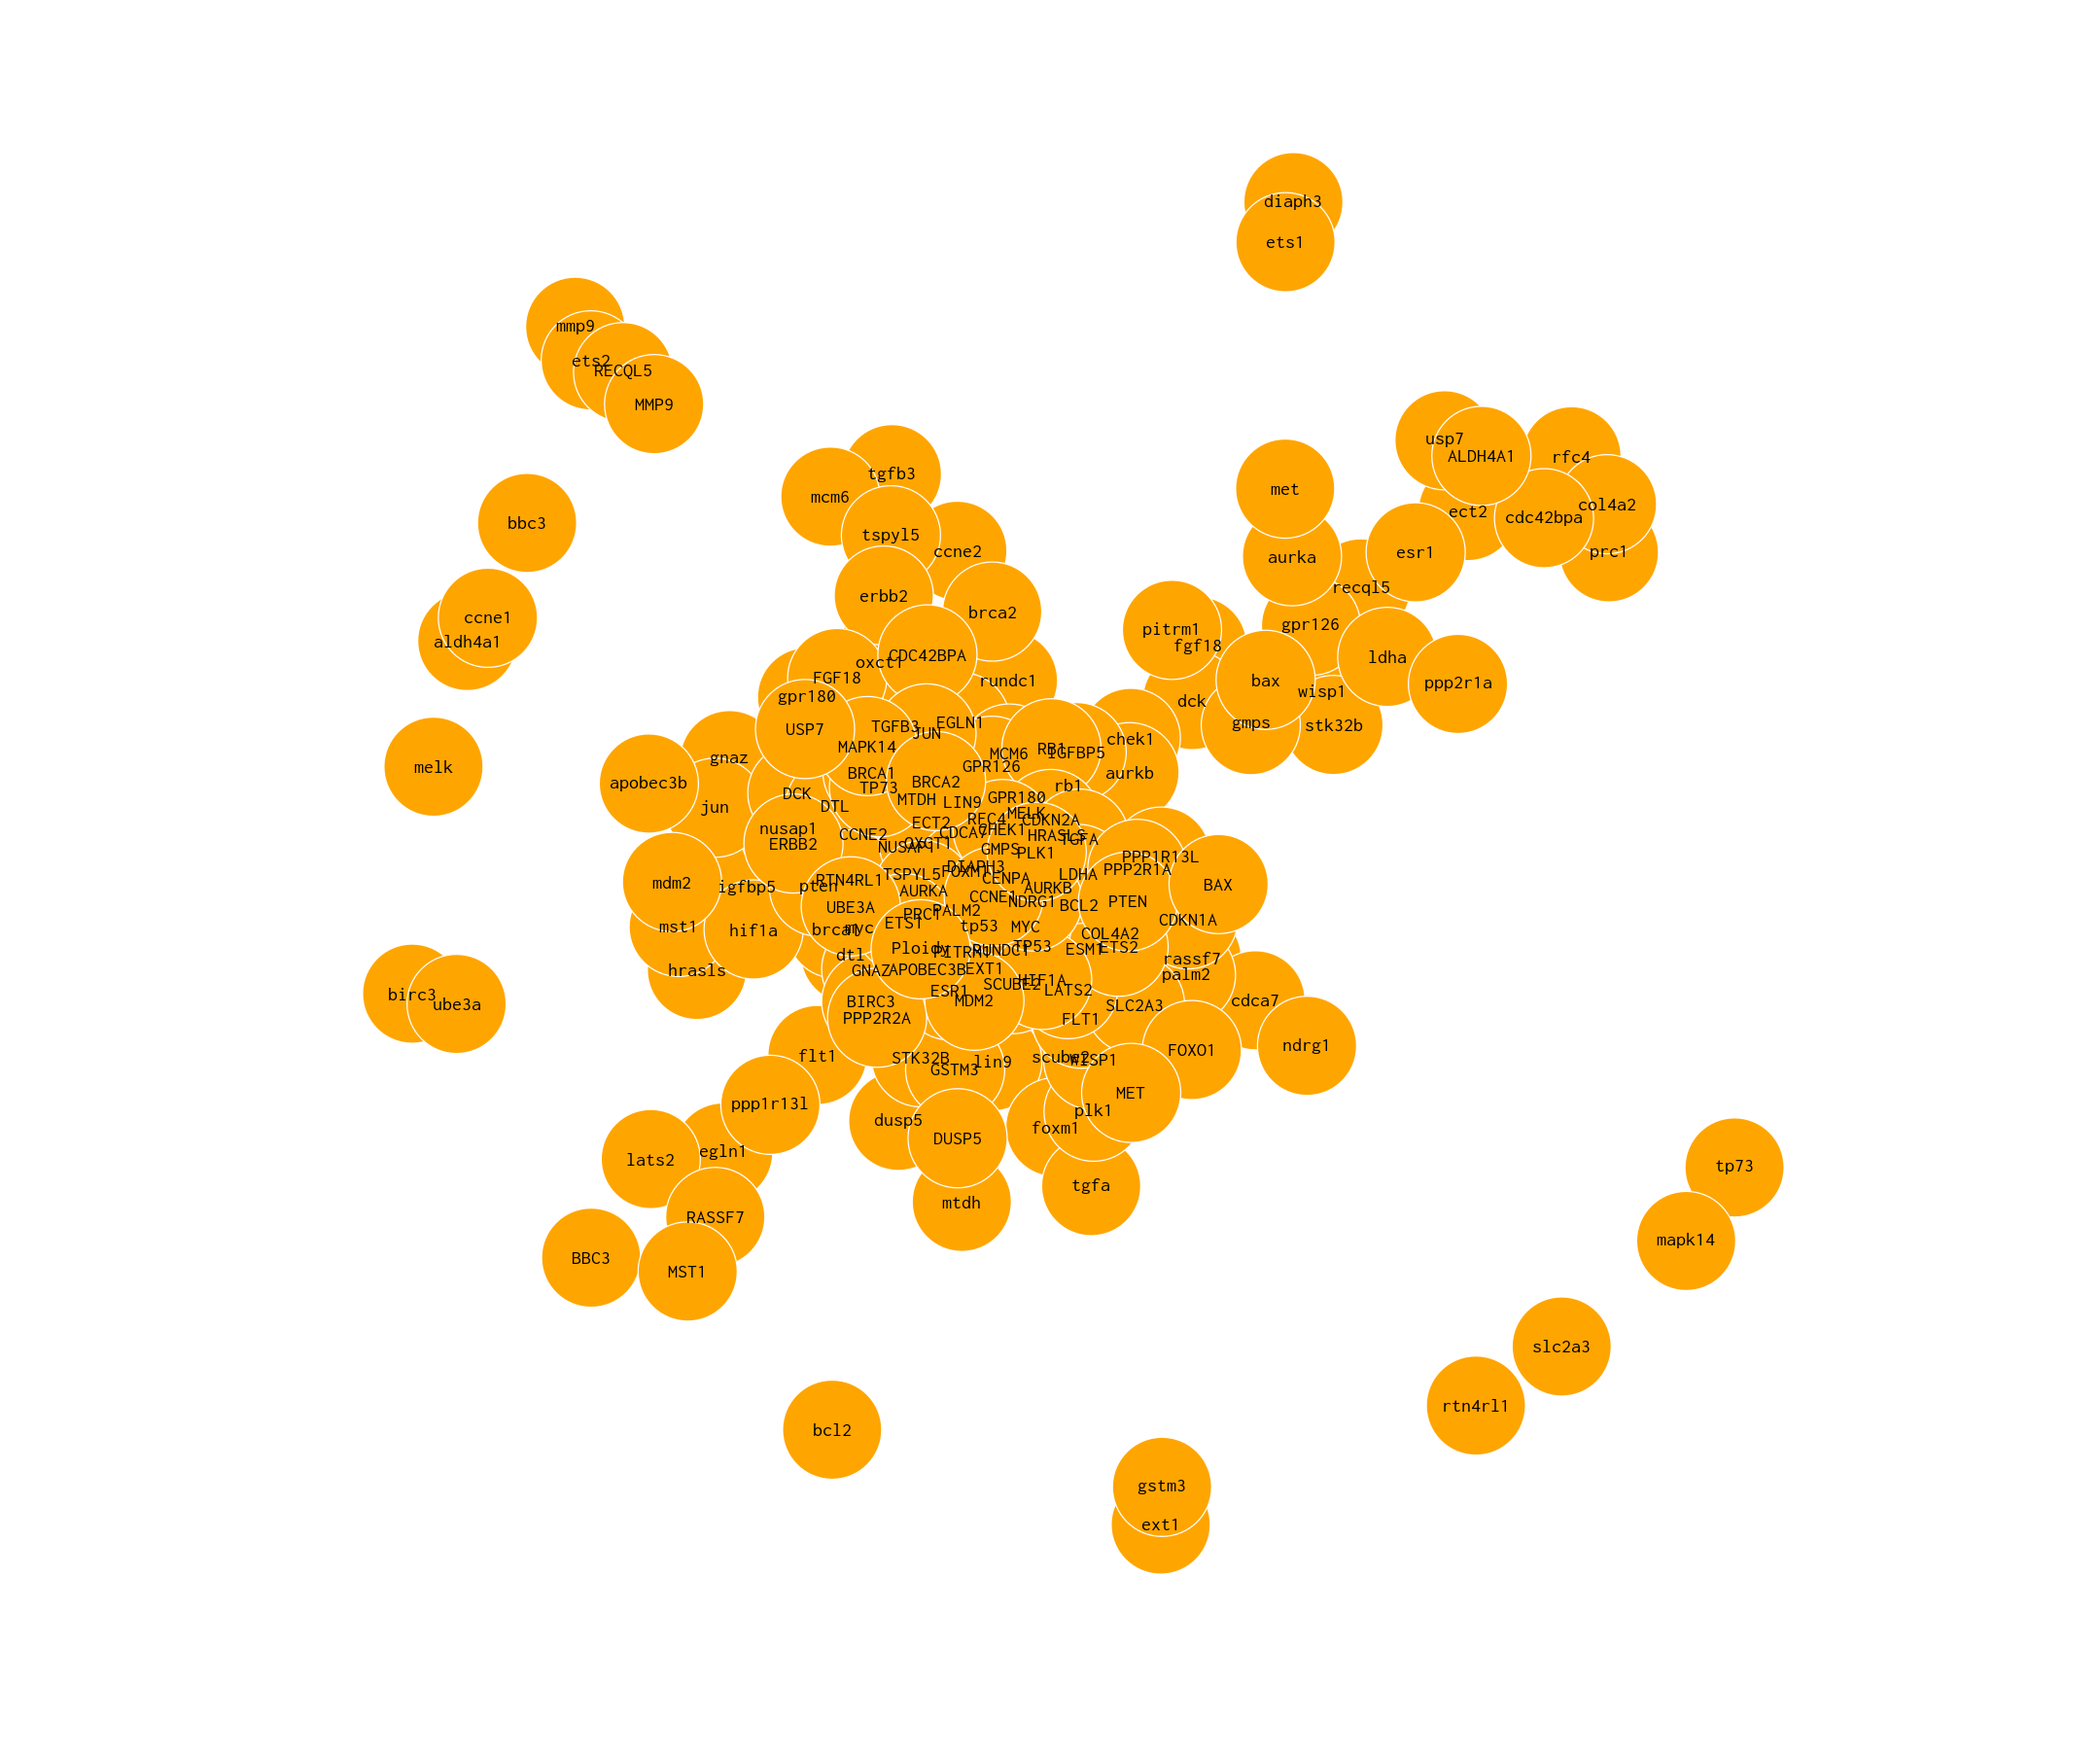

In [73]:
cosmicCancer_hc_net = igraph::graph_from_adjacency_matrix(cosmicCancer_hc_adj)
plot(cosmicCancer_hc_net,
     edge.color = "orange", vertex.color = "orange",
     vertex.frame.color ="#ffffff",
     vertex.label.color = "black",
     layout =layout_components)

In [90]:
degree_hc = degree(cosmicCancer_hc_net, mode="out")

In [116]:
zero_vertices = as.data.frame(degree_hc[degree_hc==0])

In [117]:
zero_vertices = rownames(zero_vertices)
zero_vertices

[1] "bbc3"     "tgfb3"    "fgf18"    "wisp1"    "hrasls"   "stk32b"  
 [7] "melk"     "ext1"     "gnaz"     "mtdh"     "pitrm1"   "lin9"    
[13] "mcm6"     "prc1"     "rfc4"     "dtl"      "col4a2"   "gpr180"  
[19] "mmp9"     "rtn4rl1"  "diaph3"   "palm2"    "aldh4a1"  "oxct1"   
[25] "gmps"     "gstm3"    "slc2a3"   "erbb2"    "myc"      "bcl2"    
[31] "tp73"     "lats2"    "mapk14"   "aurkb"    "brca1"    "dusp5"   
[37] "mst1"     "birc3"    "tgfa"     "ets1"     "ets2"     "ndrg1"   
[43] "ppp2r1a"  "ccne1"    "apobec3b" "mdm2"     "usp7"     "ube3a"   
[49] "plk1"     "met"      "BBC3"     "IGFBP5"   "FGF18"    "WISP1"   
[55] "HRASLS"   "GNAZ"     "PITRM1"   "RUNDC1"   "RECQL5"   "DTL"     
[61] "MMP9"     "GPR126"   "RTN4RL1"  "PALM2"    "ALDH4A1"  "OXCT1"   
[67] "ERBB2"    "TP53"     "MYC"      "JUN"      "BCL2"     "TP73"    
[73] "CHEK1"    "MST1"     "PPP1R13L" "ETS1"     "FOXO1"    "PPP2R2A" 
[79] "PTEN"     "USP7"     "UBE3A"    "PLK1"     "BAX"      "MET"

In [183]:
cleaned_graph_hc = delete_vertices(graph = cosmicCancer_hc_net, v = zero_vertices)

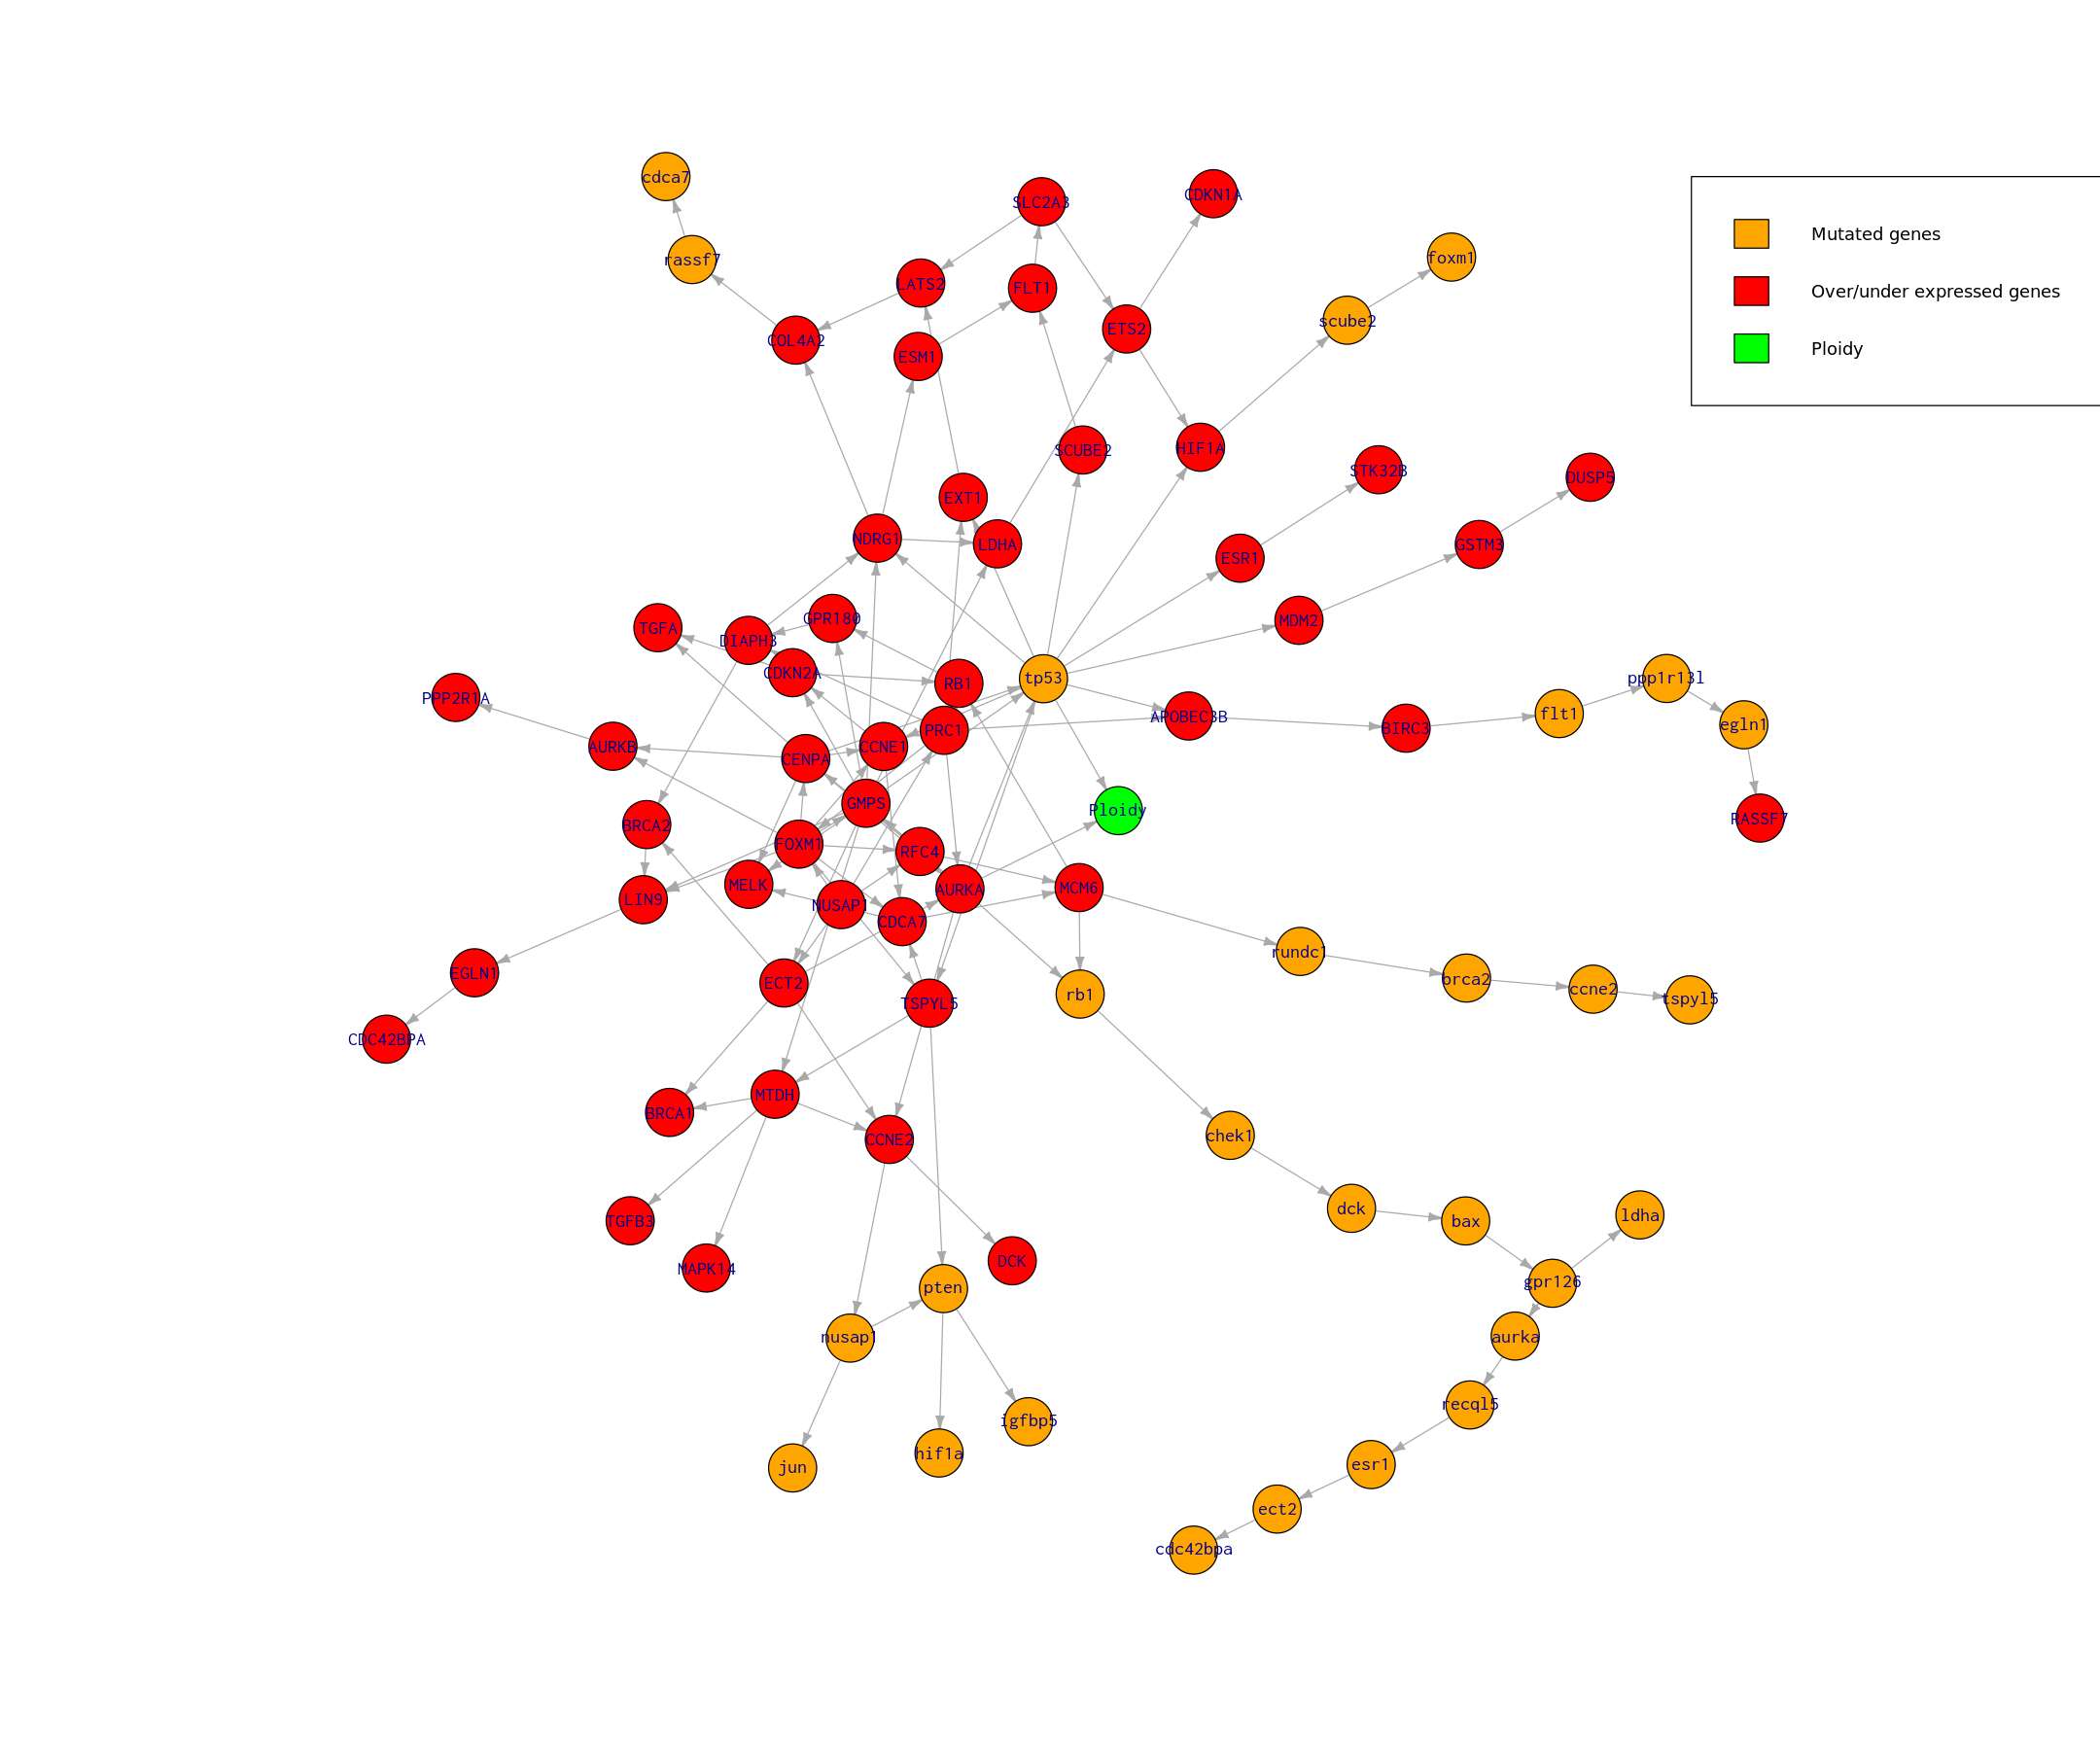

In [275]:
e <- get.edgelist(cleaned_graph_hc,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(cleaned_graph_hc))
plot(cleaned_graph_hc,layout=l,vertex.size=7, edge.arrow.size = .2, vertex.color = ifelse(V(cleaned_graph_hc)$name == toupper(V(cleaned_graph_hc)$name) , "red",ifelse(V(cleaned_graph_hc)$name == "Ploidy", "green", "orange")))
legend(0.9,1,
       legend=c("Mutated genes", "Over/under expressed genes", "Ploidy"),
       fill = c("orange", "red", "green"),       # Color of the squares
       border = "black", # Color of the border of the squares
       cex = 0.9)
# mtext("Removed 0 level vertices", side=1)

In [194]:
all_vars = colnames(cosmicCancer_hc_adj)

In [197]:
mutated_genes = all_vars[all_vars == tolower(all_vars)]
mutated_genes

[1] "bbc3"     "egln1"    "tgfb3"    "igfbp5"   "fgf18"    "scube2"  
 [7] "wisp1"    "flt1"     "hrasls"   "stk32b"   "rassf7"   "dck"     
[13] "melk"     "ext1"     "gnaz"     "mtdh"     "pitrm1"   "ccne2"   
[19] "ect2"     "lin9"     "mcm6"     "nusap1"   "tspyl5"   "rundc1"  
[25] "prc1"     "rfc4"     "recql5"   "cdca7"    "dtl"      "col4a2"  
[31] "gpr180"   "mmp9"     "gpr126"   "rtn4rl1"  "diaph3"   "cdc42bpa"
[37] "palm2"    "aldh4a1"  "oxct1"    "gmps"     "gstm3"    "slc2a3"  
[43] "foxm1"    "erbb2"    "esr1"     "tp53"     "rb1"      "myc"     
[49] "jun"      "bcl2"     "tp73"     "lats2"    "mapk14"   "chek1"   
[55] "aurkb"    "aurka"    "brca1"    "brca2"    "dusp5"    "mst1"    
[61] "ppp1r13l" "birc3"    "tgfa"     "ets1"     "ets2"     "hif1a"   
[67] "ldha"     "ndrg1"    "ppp2r1a"  "ccne1"    "apobec3b" "pten"    
[73] "mdm2"     "usp7"     "ube3a"    "plk1"     "bax"      "met"

In [198]:
over_under_genes =  all_vars[all_vars == toupper(all_vars)]
over_under_genes

[1] "BBC3"     "EGLN1"    "TGFB3"    "ESM1"     "IGFBP5"   "FGF18"   
 [7] "SCUBE2"   "WISP1"    "FLT1"     "HRASLS"   "STK32B"   "RASSF7"  
[13] "DCK"      "MELK"     "EXT1"     "GNAZ"     "MTDH"     "PITRM1"  
[19] "CCNE2"    "ECT2"     "CENPA"    "LIN9"     "MCM6"     "NUSAP1"  
[25] "TSPYL5"   "RUNDC1"   "PRC1"     "RFC4"     "RECQL5"   "CDCA7"   
[31] "DTL"      "COL4A2"   "GPR180"   "MMP9"     "GPR126"   "RTN4RL1" 
[37] "DIAPH3"   "CDC42BPA" "PALM2"    "ALDH4A1"  "OXCT1"    "GMPS"    
[43] "GSTM3"    "SLC2A3"   "ERBB2"    "ESR1"     "TP53"     "RB1"     
[49] "MYC"      "JUN"      "CDKN2A"   "BCL2"     "FOXM1"    "BRCA1"   
[55] "TP73"     "LATS2"    "MAPK14"   "CDKN1A"   "CHEK1"    "BRCA2"   
[61] "AURKB"    "AURKA"    "APOBEC3B" "DUSP5"    "MST1"     "PPP1R13L"
[67] "BIRC3"    "TGFA"     "ETS1"     "ETS2"     "HIF1A"    "LDHA"    
[73] "FOXO1"    "NDRG1"    "PPP2R1A"  "PPP2R2A"  "CCNE1"    "PTEN"    
[79] "MDM2"     "USP7"     "UBE3A"    "PLK1"     "BAX"      "MET"

In [199]:
igraph::as_data_frame(cleaned_graph_hc)

,from,to
,<chr>,<chr>
1,egln1,RASSF7
2,scube2,foxm1
3,flt1,ppp1r13l
4,rassf7,cdca7
5,dck,bax
6,ccne2,tspyl5
7,ect2,cdc42bpa
8,nusap1,jun
9,nusap1,pten


### Top 10 nodes and edges

In [245]:
topNodes = as.data.frame(betweenness(
  cleaned_graph_hc,
  v = V(cleaned_graph_hc),
  directed = TRUE,
  weights = NULL
))
colnames(topNodes) <- c('BW')
topNodes$name <- rownames(topNodes)

In [248]:
topNodes[order(topNodes$BW, decreasing = T),][0:10,]

,BW,name
,<dbl>,<chr>
tp53,244.3333,tp53
MCM6,179.1667,MCM6
NDRG1,155.2500,NDRG1
DIAPH3,146.6389,DIAPH3
CDCA7,133.3667,CDCA7
GPR180,133.0000,GPR180
rb1,130.0000,rb1
chek1,126.0000,chek1
dck,120.0000,dck


In [249]:
topEdges = as.data.frame(edge_betweenness(
  cleaned_graph_hc,
  e = E(cleaned_graph_hc),
  directed = TRUE,
  weights = NULL
))
colnames(topEdges) <- c('BW')
topEdges$name <- rownames(topEdges)

In [254]:
top10Edges = topEdges[order(topEdges$BW, decreasing = T),][0:10,]
top10Edges

,BW,name
,<dbl>,<chr>
74,164.50000,74
76,152.00000,76
26,140.00000,26
93,140.00000,93
27,135.00000,27
107,133.27778,107
5,128.00000,5
78,119.63889,78
32,119.00000,32


In [257]:
top10Edges$name

[1] "74"  "76"  "26"  "93"  "27"  "107" "5"   "78"  "32"  "56"

In [273]:
for (name in top10Edges$name){
    print(E(cleaned_graph_hc)[strtoi(name)])
}

+ 1/121 edge from 156c531 (vertex names):
[1] CDCA7->MCM6
+ 1/121 edge from 156c531 (vertex names):
[1] GPR180->DIAPH3
+ 1/121 edge from 156c531 (vertex names):
[1] rb1->chek1
+ 1/121 edge from 156c531 (vertex names):
[1] RB1->GPR180
+ 1/121 edge from 156c531 (vertex names):
[1] chek1->dck
+ 1/121 edge from 156c531 (vertex names):
[1] AURKA->tp53
+ 1/121 edge from 156c531 (vertex names):
[1] dck->bax
+ 1/121 edge from 156c531 (vertex names):
[1] DIAPH3->NDRG1
+ 1/121 edge from 156c531 (vertex names):
[1] bax->gpr126
+ 1/121 edge from 156c531 (vertex names):
[1] MCM6->rb1
